In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
df = pd.read_csv('train.csv')
df

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


In [3]:
df.Podcast_Name.unique()

array(['Mystery Matters', 'Joke Junction', 'Study Sessions',
       'Digital Digest', 'Mind & Body', 'Fitness First', 'Criminal Minds',
       'News Roundup', 'Daily Digest', 'Music Matters', 'Sports Central',
       'Melody Mix', 'Game Day', 'Gadget Geek', 'Global News',
       'Tech Talks', 'Sport Spot', 'Funny Folks', 'Sports Weekly',
       'Business Briefs', 'Tech Trends', 'Innovators', 'Health Hour',
       'Comedy Corner', 'Sound Waves', 'Brain Boost', "Athlete's Arena",
       'Wellness Wave', 'Style Guide', 'World Watch', 'Humor Hub',
       'Money Matters', 'Healthy Living', 'Home & Living',
       'Educational Nuggets', 'Market Masters', 'Learning Lab',
       'Lifestyle Lounge', 'Crime Chronicles', 'Detective Diaries',
       'Life Lessons', 'Current Affairs', 'Finance Focus', 'Laugh Line',
       'True Crime Stories', 'Business Insights', 'Fashion Forward',
       'Tune Time'], dtype=object)

In [4]:
df.Podcast_Name.describe()

count         750000
unique            48
top       Tech Talks
freq           22847
Name: Podcast_Name, dtype: object

In [5]:
df.isna().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

Correlation between Episode_Length_minutes and Listening_Time_minutes: 0.9167
Linear Model: Listening_Time_minutes = 0.7582 * Episode_Length_minutes + -3.1721
RMSE: 10.89


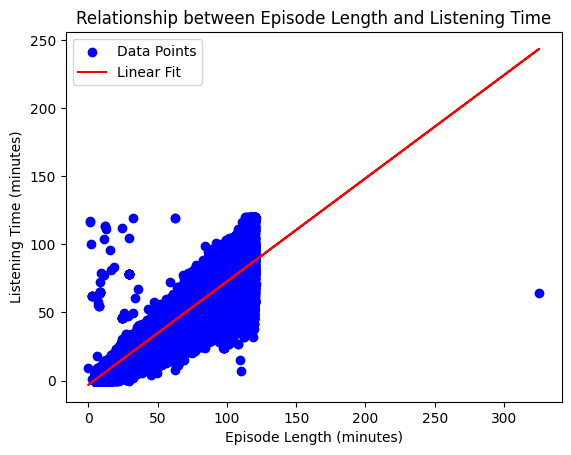

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_clean = df.dropna(subset=['Episode_Length_minutes', 'Listening_Time_minutes'])

correlation = np.corrcoef(df_clean['Episode_Length_minutes'], df_clean['Listening_Time_minutes'])[0, 1]

print(f"Correlation between Episode_Length_minutes and Listening_Time_minutes: {correlation:.4f}")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df_clean['Episode_Length_minutes'].values.reshape(-1, 1)
y = df_clean['Listening_Time_minutes'].values

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Linear Model: Listening_Time_minutes = {slope:.4f} * Episode_Length_minutes + {intercept:.4f}")

y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse:.2f}")

plt.scatter(df_clean['Episode_Length_minutes'], df_clean['Listening_Time_minutes'], color='blue', label='Data Points')
plt.plot(df_clean['Episode_Length_minutes'], y_pred, color='red', label='Linear Fit')
plt.xlabel('Episode Length (minutes)')
plt.ylabel('Listening Time (minutes)')
plt.title('Relationship between Episode Length and Listening Time')
plt.legend()
plt.show()

In [7]:
df2 = df 
df2['Episode_Length_minutes'] = df2.apply(
    lambda row: row['Listening_Time_minutes'] / 0.728 if pd.isna(row['Episode_Length_minutes']) else row['Episode_Length_minutes'],
    axis=1
)
df2.isna().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes              0
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

<Figure size 1000x600 with 0 Axes>

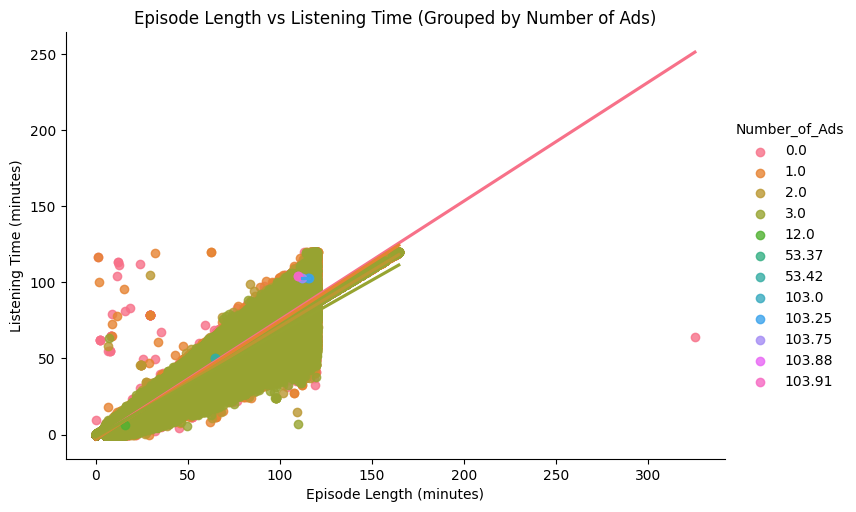

In [8]:
plt.figure(figsize=(10, 6))

sn.lmplot(x="Episode_Length_minutes", y="Listening_Time_minutes", 
           hue="Number_of_Ads", data=df2, aspect=1.5)

plt.title("Episode Length vs Listening Time (Grouped by Number of Ads)")
plt.xlabel("Episode Length (minutes)")
plt.ylabel("Listening Time (minutes)")

plt.show()

In [9]:
def count_feature(df, feature):
    return df[feature].value_counts()


In [10]:
counts = count_feature(df2, 'Number_of_Ads')
counts

Number_of_Ads
0.00      217592
1.00      214069
3.00      160173
2.00      158156
103.25         2
53.37          1
103.00         1
103.91         1
53.42          1
103.75         1
12.00          1
103.88         1
Name: count, dtype: int64

In [11]:
df3 = df2[df2['Number_of_Ads']<4]
df3

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,43.159313,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.800000,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.900000,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.170000,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.510000,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.660000,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.750000,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.980000,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.980000,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


In [12]:
df4 = df3[df3['Listening_Time_minutes']<=df3['Episode_Length_minutes']]
df4.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,43.159313,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.800000,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.900000,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.170000,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.510000,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [13]:
df4['Genre'].head()

0    True Crime
1        Comedy
2     Education
3    Technology
4        Health
Name: Genre, dtype: object

C:\Users\User\AppData\Local\Temp\ipykernel_8056\1503886459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Listening_Percentage'] = (df4['Listening_Time_minutes'] / df4['Episode_Length_minutes']) * 100


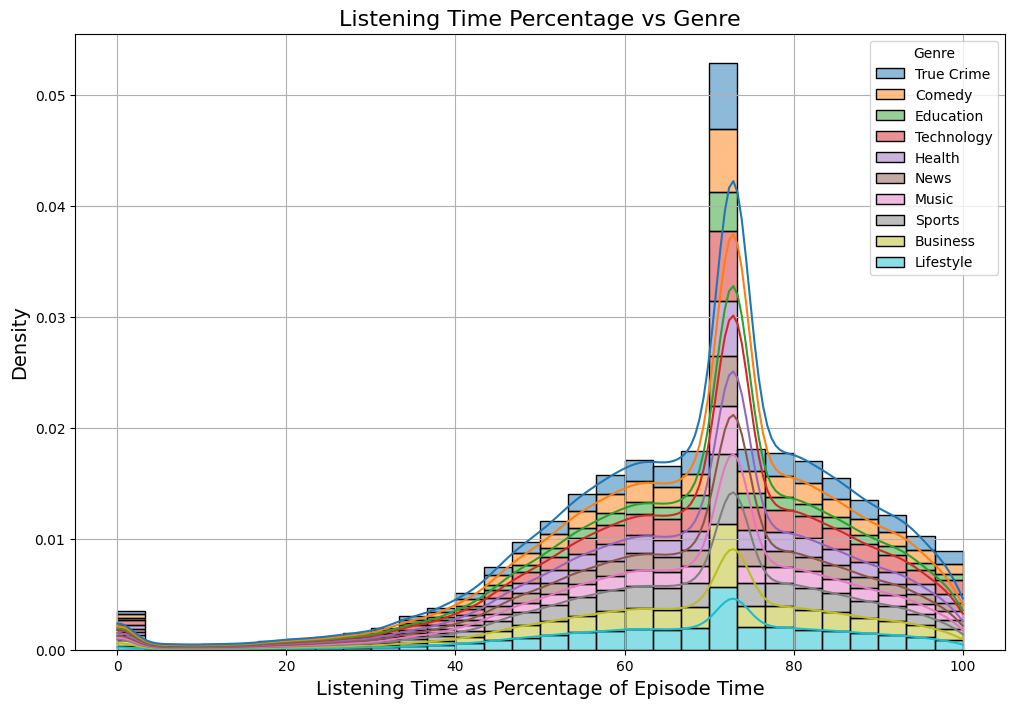

In [14]:
df4['Listening_Percentage'] = (df4['Listening_Time_minutes'] / df4['Episode_Length_minutes']) * 100

plt.figure(figsize=(12, 8))

sn.histplot(df4, x='Listening_Percentage', hue='Genre', kde=True, multiple="stack", bins=30, stat='density')

plt.title('Listening Time Percentage vs Genre', fontsize=16)
plt.xlabel('Listening Time as Percentage of Episode Time', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

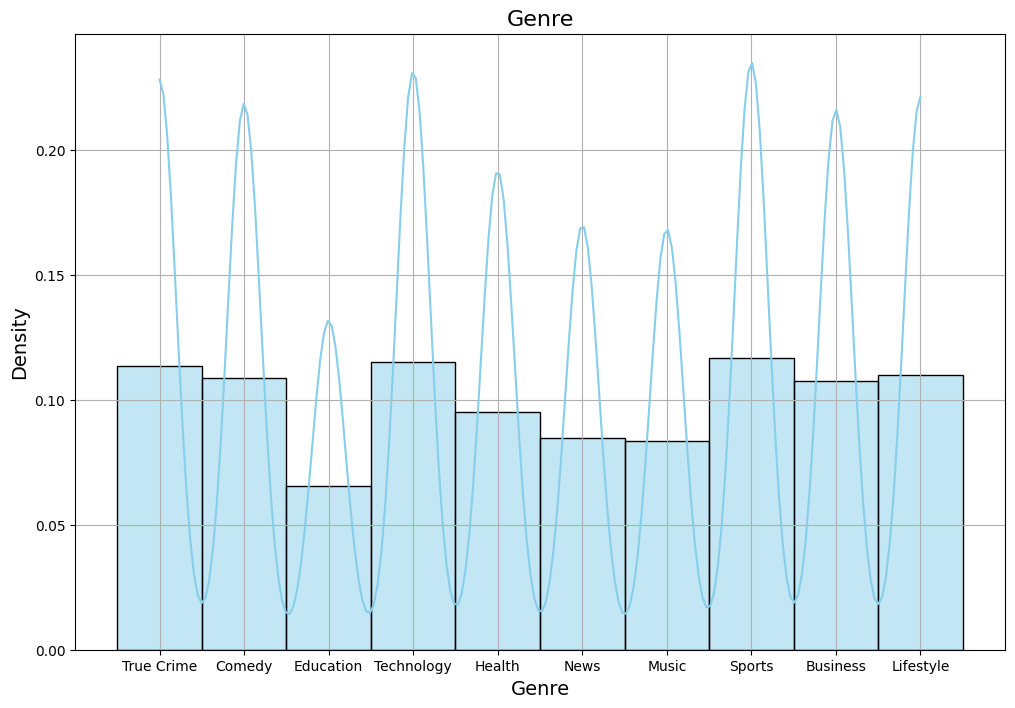

In [15]:
plt.figure(figsize=(12, 8))

sn.histplot(df4['Genre'], kde=True, color='skyblue', bins=30, stat='density')

plt.title('Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)

plt.show()

In [16]:
df4.isna().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes              0
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    145541
Number_of_Ads                       0
Episode_Sentiment                   0
Listening_Time_minutes              0
Listening_Percentage              710
dtype: int64

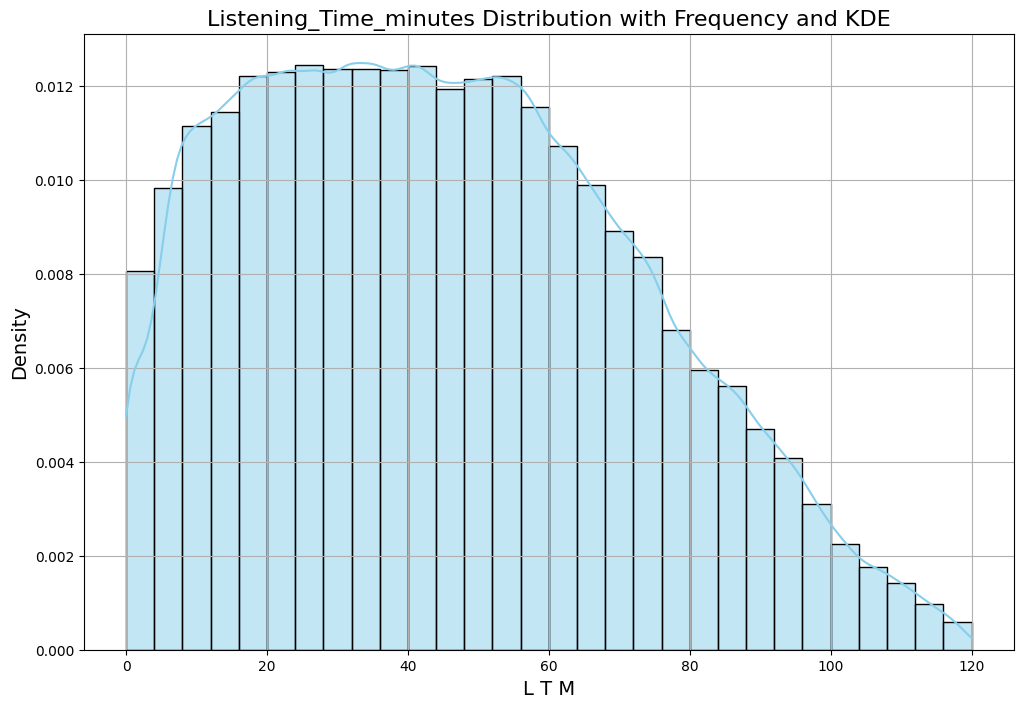

In [17]:
plt.figure(figsize=(12, 8))

sn.histplot(df4['Listening_Time_minutes'], kde=True, color='skyblue', bins=30, stat='density')

plt.title('Listening_Time_minutes Distribution with Frequency and KDE', fontsize=16)
plt.xlabel('L T M', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)

plt.show()

<Figure size 1000x600 with 0 Axes>

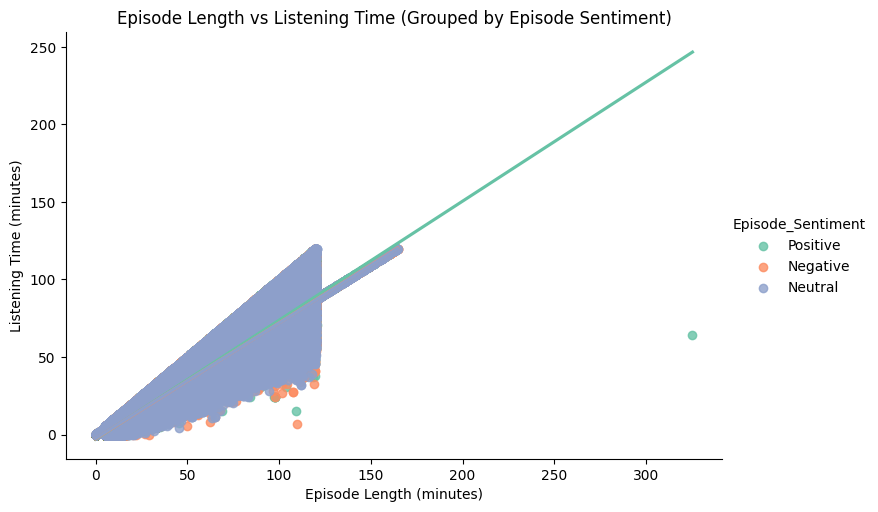

In [18]:
plt.figure(figsize=(10, 6))
sn.lmplot(x="Episode_Length_minutes", y="Listening_Time_minutes", 
           hue="Episode_Sentiment", data=df4, aspect=1.5, palette="Set2")
plt.title("Episode Length vs Listening Time (Grouped by Episode Sentiment)")
plt.xlabel("Episode Length (minutes)")
plt.ylabel("Listening Time (minutes)")
plt.show()

In [19]:
df4['Episode_Sentiment'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [20]:
df4

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Listening_Percentage
0,0,Mystery Matters,Episode 98,43.159313,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998,72.800000
1,1,Joke Junction,Episode 26,119.800000,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241,73.466119
2,2,Study Sessions,Episode 16,73.900000,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531,60.792030
3,3,Digital Digest,Episode 45,67.170000,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824,68.897186
4,4,Mind & Body,Episode 86,110.510000,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031,68.419428
...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.660000,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058,75.165979
749996,749996,Business Briefs,Episode 21,75.750000,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242,60.016396
749997,749997,Lifestyle Lounge,Episode 51,30.980000,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000,49.257586
749998,749998,Style Guide,Episode 47,108.980000,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939,92.429244


In [21]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply Label Encoding using .loc to avoid the warning
df4.loc[:, 'Genre_encoded'] = label_encoder.fit_transform(df4['Genre'])
df4.loc[:, 'Episode_Sentiment_encoded'] = label_encoder.fit_transform(df4['Episode_Sentiment'])

# Display the updated dataframe with encoded columns
print(df4[['Genre', 'Genre_encoded', 'Episode_Sentiment', 'Episode_Sentiment_encoded']].head())


        Genre  Genre_encoded Episode_Sentiment  Episode_Sentiment_encoded
0  True Crime              9          Positive                          2
1      Comedy              1          Negative                          0
2   Education              2          Negative                          0
3  Technology              8          Positive                          2
4      Health              3           Neutral                          1


C:\Users\User\AppData\Local\Temp\ipykernel_8056\910073324.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.loc[:, 'Genre_encoded'] = label_encoder.fit_transform(df4['Genre'])
C:\Users\User\AppData\Local\Temp\ipykernel_8056\910073324.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.loc[:, 'Episode_Sentiment_encoded'] = label_encoder.fit_transform(df4['Episode_Sentiment'])


In [22]:
df4.head(30)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Listening_Percentage,Genre_encoded,Episode_Sentiment_encoded
0,0,Mystery Matters,Episode 98,43.159313,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998,72.800000,9,2
1,1,Joke Junction,Episode 26,119.800000,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241,73.466119,1,0
2,2,Study Sessions,Episode 16,73.900000,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531,60.792030,2,0
3,3,Digital Digest,Episode 45,67.170000,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824,68.897186,8,2
4,4,Mind & Body,Episode 86,110.510000,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031,68.419428,3,1
5,5,Fitness First,Episode 19,26.540000,Health,48.96,Saturday,Afternoon,NaN,3.0,Positive,22.77047,85.796797,3,2
6,6,Criminal Minds,Episode 47,69.830000,True Crime,35.82,Sunday,Night,39.02,0.0,Neutral,64.75024,92.725533,9,1
7,7,News Roundup,Episode 44,48.520000,News,44.99,Thursday,Night,20.12,0.0,Positive,22.37517,46.115354,6,2
8,8,Daily Digest,Episode 32,105.870000,News,69.81,Monday,Evening,NaN,2.0,Neutral,68.00124,64.230887,6,1
9,9,Music Matters,Episode 81,63.114849,Music,82.18,Thursday,Night,59.72,3.0,Neutral,45.94761,72.800000,5,1


In [23]:
df4 = df4.sort_values('Listening_Time_minutes', ascending=False)

In [24]:
x_init = df4[['Episode_Length_minutes','Genre_encoded','Number_of_Ads','Episode_Sentiment_encoded','Listening_Time_minutes']]
x_init.shape

(747422, 5)

In [25]:
x_clean = x_init.drop_duplicates(keep='first')
print('x_clean', x_clean.shape)
y=x_clean.Listening_Time_minutes
x = x_clean[['Episode_Length_minutes','Genre_encoded','Number_of_Ads','Episode_Sentiment_encoded']]
print(x.shape)
print(len(y))

x_clean (688456, 5)
(688456, 4)
688456


In [26]:
duplicates_in_x = x.duplicated()
print("Number of duplicate rows in x:", duplicates_in_x.sum())
print("duplicate check for x ", x[duplicates_in_x])
combined = x.copy()
combined['Listening_Time_minutes'] = y.values  
combined_clean = combined.drop_duplicates(subset=['Episode_Length_minutes', 'Genre_encoded', 'Number_of_Ads', 'Episode_Sentiment_encoded'])
x = combined_clean[['Episode_Length_minutes', 'Genre_encoded', 'Number_of_Ads', 'Episode_Sentiment_encoded']]
y = combined_clean['Listening_Time_minutes']
print(x.shape)
print(len(y))

Number of duplicate rows in x: 176121
duplicate check for x          Episode_Length_minutes  Genre_encoded  Number_of_Ads  \
655823                  119.67              1            1.0   
201438                  119.59              8            0.0   
694513                  119.44              5            0.0   
713418                  119.46              2            1.0   
540207                  118.91              1            0.0   
...                        ...            ...            ...   
726815                    9.31              5            0.0   
463793                    8.76              6            1.0   
464946                   15.43              9            0.0   
542867                    8.25              0            1.0   
652274                    8.39              3            2.0   

        Episode_Sentiment_encoded  
655823                          0  
201438                          1  
694513                          1  
713418                    

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

def find_best_model_and_estimators(X_train, y_train):
    model_params = {
        'random_forest': {
            'model': RandomForestRegressor(), 
            'params': {
                'randomforestregressor__n_estimators': [50],
                'randomforestregressor__max_depth': [20],
                'randomforestregressor__min_samples_split': [2],
                'randomforestregressor__min_samples_leaf': [2],
                'randomforestregressor__criterion': ['squared_error'],  
                'randomforestregressor__bootstrap': [True],
            }
        }
    }

    scores = []
    best_estimators = {}

    cv = ShuffleSplit(n_splits=4, test_size=0.3, random_state=0)

    for algo, mp in model_params.items():
        pipe = make_pipeline(StandardScaler(), mp['model'])
        clf = GridSearchCV(pipe, mp['params'], cv=cv, return_train_score=False, n_jobs=-1)
        clf.fit(X_train, y_train)
        
        # Make predictions on the training set to compute RMSE
        y_pred = clf.predict(X_train)
        rmse = np.sqrt(mean_squared_error(y_train, y_pred))
        
        scores.append({
            'model': algo,
            'RMSE': rmse,
            'best_params': clf.best_params_
        })
        
        best_estimators[algo] = clf.best_estimator_

    return pd.DataFrame(scores, columns=['model', 'RMSE', 'best_params']), best_estimators


In [33]:
best_scores, best_estimators = find_best_model_and_estimators(x, y)
print(best_scores)  
print(best_estimators)

           model      RMSE                                        best_params
0  random_forest  7.387632  {'randomforestregressor__bootstrap': True, 'ra...
{'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=2,
                                       n_estimators=50))])}


In [34]:
print(best_estimators)

{'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=2,
                                       n_estimators=50))])}


In [35]:
best_scores

,model,RMSE,best_params
0,random_forest,7.387632,"{'randomforestregressor__bootstrap': True, 'ra..."


In [36]:
tdf = pd.read_csv('test.csv')
tdf

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
249995,999995,Mind & Body,Episode 100,21.05,Health,65.77,Saturday,Evening,96.40,3.0,Negative
249996,999996,Joke Junction,Episode 85,85.50,Comedy,41.47,Saturday,Night,30.52,2.0,Negative
249997,999997,Joke Junction,Episode 63,12.11,Comedy,25.92,Thursday,Evening,73.69,1.0,Neutral
249998,999998,Market Masters,Episode 46,113.46,Business,43.47,Friday,Night,93.59,3.0,Positive


In [39]:
tdf.isna().sum()

id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28736
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64

In [42]:
tdf['Episode_Length_minutes'].describe()

count    2.212640e+05
mean     4.192987e+02
std      1.668545e+05
min      2.470000e+00
25%      3.578000e+01
50%      6.397000e+01
75%      9.415000e+01
max      7.848626e+07
Name: Episode_Length_minutes, dtype: float64

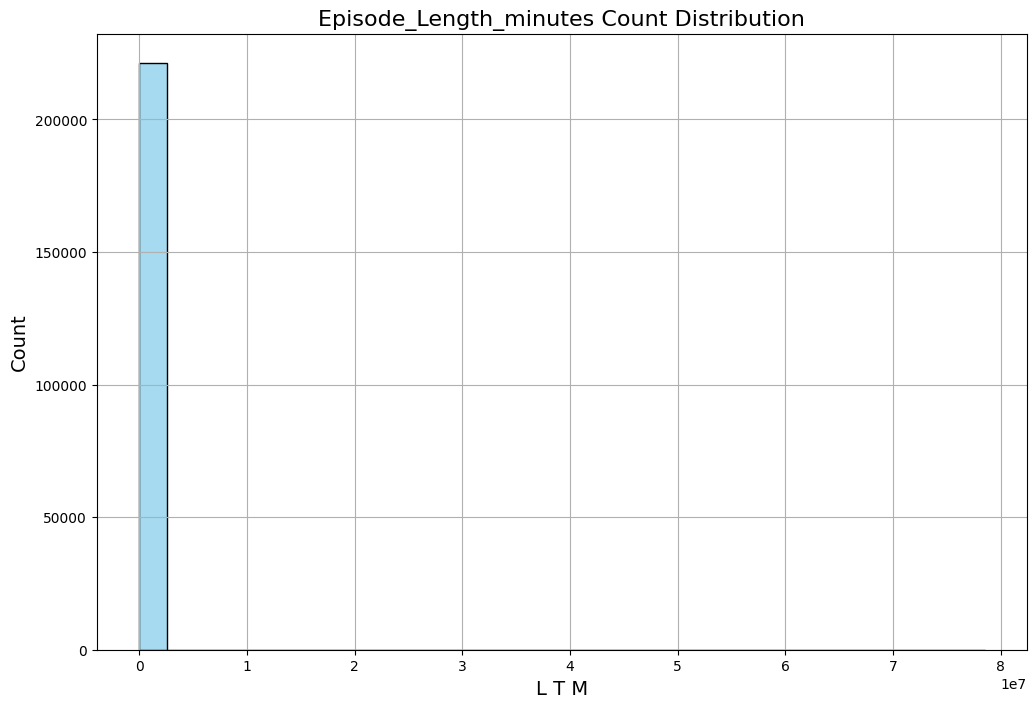

In [44]:
plt.figure(figsize=(12, 8))

sn.histplot(tdf['Episode_Length_minutes'], kde=False, color='skyblue', bins=30)

plt.title('Episode_Length_minutes Count Distribution', fontsize=16)
plt.xlabel('L T M', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)

plt.show()


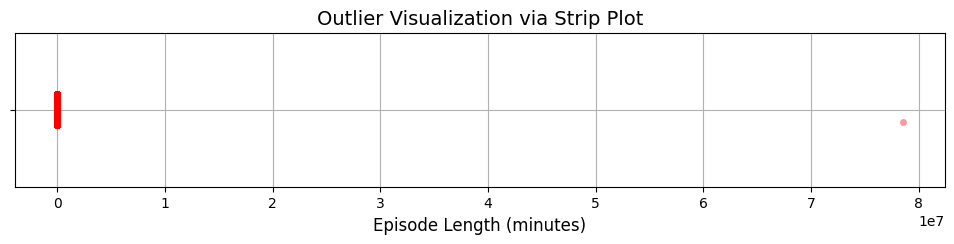

In [46]:
plt.figure(figsize=(12, 2))
sn.stripplot(x=tdf['Episode_Length_minutes'], color='red', alpha=0.4)

plt.title('Outlier Visualization via Strip Plot', fontsize=14)
plt.xlabel('Episode Length (minutes)', fontsize=12)
plt.grid(True)
plt.show()


In [47]:
duplicates = tdf[tdf.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [id, Podcast_Name, Episode_Title, Episode_Length_minutes, Genre, Host_Popularity_percentage, Publication_Day, Publication_Time, Guest_Popularity_percentage, Number_of_Ads, Episode_Sentiment]
Index: []


In [52]:
tdf.head(30)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral
5,750005,Money Matters,Episode 43,34.44,Business,77.18,Sunday,Night,NaN,0.0,Neutral
6,750006,Mystery Matters,Episode 33,116.09,True Crime,27.57,Friday,Night,22.82,1.0,Positive
7,750007,Gadget Geek,Episode 24,54.59,Technology,94.86,Tuesday,Morning,94.76,1.0,Neutral
8,750008,Home & Living,Episode 87,92.69,Lifestyle,75.22,Friday,Night,72.63,0.0,Neutral
9,750009,True Crime Stories,Episode 76,100.65,True Crime,27.66,Tuesday,Evening,NaN,1.0,Negative


In [54]:
tdf['Podcast_Name'].value_counts()


Podcast_Name
Tech Talks             7553
Sports Weekly          6633
Funny Folks            6621
Fitness First          6543
Style Guide            6469
Business Insights      6448
Tech Trends            6446
Melody Mix             6357
Game Day               6345
Criminal Minds         5980
Crime Chronicles       5867
Finance Focus          5859
Detective Diaries      5799
Fashion Forward        5787
Tune Time              5733
Lifestyle Lounge       5688
Business Briefs        5685
Athlete's Arena        5662
Humor Hub              5476
Sports Central         5424
True Crime Stories     5417
Mystery Matters        5268
Comedy Corner          5258
Digital Digest         5246
Joke Junction          5039
Wellness Wave          4948
Home & Living          4933
Laugh Line             4906
Gadget Geek            4849
Sport Spot             4844
Life Lessons           4823
Sound Waves            4689
Global News            4625
Mind & Body            4581
World Watch            4556
Current

In [55]:
tdf['Episode_Length_minutes'] = tdf.groupby(['Podcast_Name', 'Genre'])['Episode_Length_minutes']\
                                   .transform(lambda x: x.fillna(x.mean()))
tdf.isnull().sum()

id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes            19
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64

In [56]:
tdf['Episode_Length_minutes'] = tdf.groupby('Genre')['Episode_Length_minutes']\
                                   .transform(lambda x: x.fillna(x.mean()))
tdf.isnull().sum()

id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes             0
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64